# <span style="color:rgb(75,104,184)">Évaluation d'un apprentissage et méthodes d'optimisation</span>

# <span style="color:rgb(75,104,184)">Méthodes d'optimisation</span>


# <span style="color:rgb(75,104,184)">TP2 - Optimisation avec la méthode de gradient</span>


Les librairies NumPy et SciPy seront utilisées durant la séance du TP.

- Les différents blocs sont faits pour être exécutés les uns à la suite des autres. On prendra notamment soin d'exécuter le premier bloc ci-dessous pour disposer de toutes les fonctions utiles.

In [1]:
# Imports des bibliothèques et fonctions utiles

# génération des graphiques avec matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt # Racine carrée

# NumPy : propose des structures vectorielles et matricielles
import numpy as np # NumPy library
from numpy.random import multivariate_normal, uniform, randn # distributions de probabilité : multivariate_normal pour simu_linreg

# SciPy - Calculs mathématiques efficaces
from scipy.linalg import norm # normes classiques (à utiliser pour implémenter le TP)
from scipy.linalg import toeplitz # matrices de Toeplitz pour simu_linreg (vous pouvez ne pas regarder)
from scipy.optimize import check_grad # Vérification des dérivées (vous pouvez ne pas regarder)


## <span style="color:rgb(75,104,184)">Étude de la descente de gradient pour les fonctions non convexes</span>

Notre but est d'observer un résultat concernant la convergence de la descente de gradient. Il a en effet été démontré que la descente de gradient peut s'échapper de points stationnaires d'ordre 1 qui ne vérifient pas la condition d'optimalité à l'ordre deux **presque sûrement**.

## <span style="color:rgb(75,104,184)">2.1 Un problème quadratique</span>

On considère le problème
$$
    \mbox{minimiser}_{\mathbf{w} \in \mathbb{R}^d}\ q(\mathbf{w}):=\frac{1}{2} \mathbf{w}^T \mathbf{A} \mathbf{w}
$$
où $\mathbf{A}$ est une matrice diagonale avec entrées $(1,\dots,1,-\lambda)$ sur la diagonale et $\lambda \in (0,1]$. On a alors $\|\mathbf{A}\|=1$.

### <span style="color:rgb(75,104,184)">Question 1</span> 

*La matrice hessienne de $q$ est $\nabla^2 q(\mathbf{w}) = \mathbf{A}$. En posant $\mathbf{e}_d$ le dernier vecteur de la base canonique, on note que $\mathbf{e}_d^T \mathbf{A} \mathbf{e}_d = -\lambda < 0$. En déduire que la fonction $q$ ne peut pas être convexe.*

### <span style="color:rgb(75,104,184)">Réponse à la question 1</span>

<span style="color:red;font-weight:bold"> 
    En regardant le cours, par définition, si la fonction $q$ était convexe, alors la matrice hessienne
    (Dérivée d'ordre 2) doit être semi-définie positive, c'est-à-dire $\nabla^2 q(\mathbf{w}) = \mathbf{A} \succeq 0$ pour
    tout $\mathbf{w} \in \mathbb{R}$. 
</span>

<span style="color:red;font-weight:bold"> 
    Pour tout vecteur $\mathbf{v}$, $\mathbf{e}_d$ ne vérifie pas cette propriété. On en déduit que la matrice $\mathbf{A}$ n'est pas semi-définie positive. Par conséquent, la fonction $q$ n'est pas convexe.
</span>

### <span style="color:rgb(75,104,184)">Question 2</span>

*La fonction objectif est-elle minorée ?*

### <span style="color:rgb(75,104,184)">Réponse à la question 2</span>

<span style="color:red;font-weight:bold"> Soit le $e_d$ le dernier vectuer de la base canonique de $\mathbb{R}^d$. Si la fonction n'est pas minoree, alors pour tout t \in $\mathbb{R}, on a : $
    





</span>

### <span style="color:rgb(75,104,184)">Question 3</span>

*Le point $\mathbf{w}=\mathbf{0}$ vérifie-t-il la condition nécessaire d'optimalité à l'ordre 1 ? Est-ce un minimum local ?*

### <span style="color:rgb(75,104,184)">Réponse à la question 3</span>

<span style="color:red;font-weight:bold"> ? </span>


### <span style="color:rgb(75,104,184)">Question 4</span> 

*Compléter le code ci-dessous pour afficher la fonction $q$ en dimension 2.*

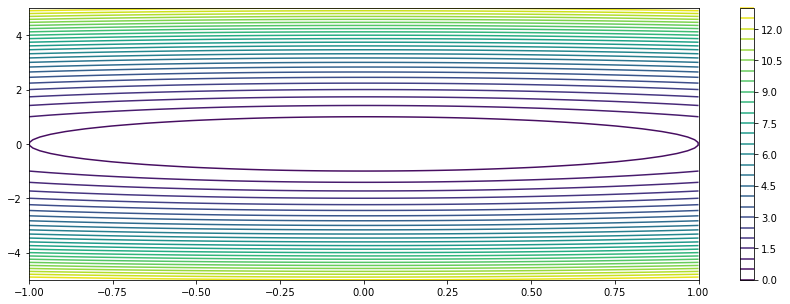

In [11]:
# Define relevant quantities
d = 2
lbda = 0.01

# A COMPLETER : DEFINIR LA MATRICE A 
A = np.eye(d)

# ET LA FONCTION quadratique
Aquad = lambda w : (0.5) * w.dot(A.dot(w))

# FIN A COMPLETER


# Afficher les contours de la fonction objectif en dimension 2
if d==2:
    delta = 5
    w1 = np.linspace(-1,1,100)
    w2 = np.linspace(-delta,delta,100)
    fw = [[Aquad(np.array([u1,u2])) for u1 in w1] for u2 in w2]
    plt.figure(figsize=(15,5))
    plt.contour(w1,w2,fw,levels=30)
    plt.colorbar()

## <span style="color:rgb(75,104,184)">2.2 Application de la descente de gradient</span>

On va maintenant appliquer la descente de gradient sur ce problème. Pour cela, on définit une nouvelle classe Python pour implémenter les fonctions quadratiques de la forme $q: \mathbf{w} \mapsto 0.5\,\mathbf{w}^T \mathbf{A} \mathbf{w}$.

Pour tout $\mathbf{w} \in \mathbb{R}^d$, on a 
$$
    \nabla q(\mathbf{w}) = \mathbf{A} \mathbf{w}.
$$
et le problème est de classe $\mathcal{C}^{1,1}_{\|\mathbf{A}\|}$.

Le code ci-dessous implémente une classe Python pour ce type de problèmes. 

### <span style="color:rgb(75,104,184)">Question 5</span> 

Compléter le code par rapport a ce qui a été fait pendant le TP1

In [15]:
# Classe Python pour les problèmes quadratiques homogènes
class QuadPb(object):
    '''
        Classe de problèmes de la forme minimiser_w 0.5*w^T A w, avec A une matrice symétrique.
        
        Attributs:
            A: Matrice carrée symétrique
            d: Nombre de lignes/Nombre de colonnes de la matrice
            
        Méthodes:
            fun: Calcul de la valeur de l'objectif 0.5*w^T A w en w
            grad: Calcul du gradient de l'objectif A w en w
            lipgrad: Calcul de la constante de Lipschitz ||A|| pour le gradient
    '''
   
    # Constructeur
    def __init__(self, A):
        self.A = A
        self.d = A.shape[0]
    
    # Fonction objectif
    def fun(self, w):
        ## COMPLETER LE CODE AVEC LA FORMULE DE LA FONCTION OBJECTIF
        return (1/(2 * self.n)) * norm(X.dot(w) - y)**2
    
    # Calcul du gradient
    def grad(self, w):
        ## COMPLETER LE CODE AVEC LA FORMULE DU GRADIENT
        return (1/n) * X.T.dot((X.dot(w)-y))

    # Constante de Lipschitz pour le gradient
    def lipgrad(self):
        L = norm(self.X, ord=2) ** 2 / self.n # Calcul plus économe de ||X^T X||
        return L 

### <span style="color:rgb(75,104,184)">Question 6</span>

*Supposons que la descente de gradient avec pas $\frac{1}{L}$ atteint un itéré $\mathbf{w}_k$ tel que $q(\mathbf{w}_k)<0$. Peut-on garantir que la méthode ne convergera pas vers le vecteur nul $\mathbf{0}$?*

### <span style="color:rgb(75,104,184)">Réponse à la question 6</span>
<span style="color:red;font-weight:bold"> ? </span>

### <span style="color:rgb(75,104,184)">Question 7</span>

*Si la méthode de descente de gradient démarre d'un point tel que $[\mathbf{w}_0]_d=0$, justifier que $[\mathbf{w}_k]_d=0$ pour tout $k$. En déduire que la méthode ne pourra pas produire un point tel que $q(\mathbf{w}_k) < 0$.*


### <span style="color:rgb(75,104,184)">Réponse à la question 7</span> 

<span style="color:red;font-weight:bold"> Par defintion de la decente gradient : $w_1 = w_0 - \alpha_0 \nabla q(w_0) = w_0 - \alpha_0 A w_0.$

La matrice A est diagonale, donc pour tout i = 1,.....,d

$$
[A w_0]_i = [A]_ii [w_0]_i
$$

En combinat ca avec l'teration de la disent gradinet, on obtient :
    
$$
[w_1]_d = [w_0]_d - [w_0]_i [\alpha]_dd A [w]_d = 0
$$
</span>

### <span style="color:rgb(75,104,184)">Question 8</span>

Reprenez la méthode de la déscente gradient implémentée dans le TP1 dans le bloc ci-dessous :

In [13]:
# Descente de gradient
def grad_desc(w0,problem,stepchoice=0,step0=1, n_iter=1000, verbose=False): 
    """
        Un code pour la descente de gradient sur problèmes structurés avec différents choix de 
        longueurs de pas.
        
        Entrées:
            w0: Vecteur initial
            problem: Structure représentant le problème
                problem.fun(w) Fonction objectif
                problem.grad(w) Gradient
                problem.lipgrad() Constante de Lipschitz du gradient
            stepchoice: Stratégie pour la longueur de pas (see above)
                0: Constante égale à 1/L
            step0: Longueur de pas initiale (utile si stepchoice = 1)
            n_iter: Nombre maximum d'itérations
            verbose: Booléen réglant l'affichage des informations à chaque itération
      
        Sorties:
            w_output: Itéré final de la méthode
            objvals: Historique des valeurs de fonctions (tableau Numpy de taille n_iter)
            ngvals: Historique des normes de gradient (tableau Numpy de taille n_iter)
            
    """
    ############
    # Initialisation

    # Historique des valeurs
    objvals = []
    # Normes de gradient
    ngvals = []
    
    # Constante de Lipschitz
    L = problem.lipgrad()
    # Valeur initiale de l'itéré courant   
    w = w0.copy()

    # Initialisation du compteur d'itérations
    k=0    
    
    # Fonction objectif en le point courant
    ## COMPLETER LE CODE AVEC LE CALCUL DE LA FONCTION OBJECTIF EN POINT INITIAL (POIDS INITIAUX) 
    
    obj = problem.fun(w0)
    
    # Gradient en le point initial
    ## COMPLETER LE CODE AVEC LE CALCUL DU GRADIENT EN POINT INITIAL

    g = problem.grad(w0)
    
    # on garde une trace de la fonction objectif et la norme gradient pendant la recherche 
    objvals.append(obj);
    ng = norm(g)
    ngvals.append(ng)

    # Affichage des valeurs initiales 
    if verbose:
        print("Descente de gradient :")
        print(' | '.join([name.center(8) for name in ["iter", "fval", "ngrad"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % ng).rjust(8)]))
    
    ####################
    # Boucle principale
    while (k < n_iter):
        
        # A COMPLETER AVEC LES DIFFÉRENTES STRATÉGIES CITÉES
        # Choisir la longueur de pas et mettre à jour l'itéré
        if strategy==0:
            # Longueur de pas 
            w[:] = w - (1/L * g)
        else:
            print("no strategy was selected for the gradient")
            sys.exit(1)
        
        # FIN A COMPLETER
        
        
        # A COMPLÉTER AVEC LE CALCUL DE NOUVELLES INFORMATION EN POINT COURANT

        obj = problem.fun(w)
        g = problem.grad(w)

        # on garde une trace de la fonction objectif et la norme gradient pendant la recherche 
        objvals.append(obj)
        ng = norm(g)
        ngvals.append(ng)
        
        # Affichage si demandé
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % ng).rjust(8)]))       
        
        # A COMPLÉTER POUVOIR PASSER À L'ITÉRATION SUIVANTE
        k += 1
    
    # Fin boucle principale
    ######################
    
    
    return w_output, np.array(objvals), np.array(ngvals)

### <span style="color:rgb(75,104,184)">Question 9</span>

Le code ci-dessous teste plusieurs points initiaux en se basant sur les résultats des questions 12 et 13. Il permet d'observer qu'un choix aléatoire de $\mathbf{w}_0$ conduit presque sûrement à esquiver le point selle, tandis qu'un choix précis comme celui de la question 13 peut conduire à converger vers ce point selle.

In [16]:
# Creation de l'instance de classe QuadPb
pbquad = QuadPb(A)
# Tester un ensemble de points initiaux au hasard
ntrials = 30
step = 1

# Booléen pour l'ajout d'un point problématique
#failpt = False
failpt = True

# Initialisation de structures
if failpt:
    W0 = np.zeros((ntrials+1,d))
    Wf = np.zeros((ntrials+1,d))
    vf = np.zeros(ntrials+1)
else:
    W0 = np.zeros((ntrials,d))
    Wf = np.zeros((ntrials,d))
    vf = np.zeros(ntrials)

# Compteur du nombre de bonnes exécutions (pour lesquelles on esquive l'origine)
goodtrials = 0

# Lancement des instances de l'algorithme
for i in range(ntrials):
    w0 = uniform([-1,-1],[1,1],size=d)
    W0[i,:] = w0 
    Wf[i,:], obj_q, ngrad_q = grad_desc(w0,pbquad,0,step,100)
    vf[i] = obj_q[-1]
    if vf[i]<0:
        goodtrials += 1
        
# Ajout d'un point problématique pour la descente de gradient
if failpt:
    # A COMPLETER
    w0 = np.ones(d)
    w0[-1] = 0 # Pas de composante selon les vecteurs propres correspondant aux valeurs propres négatives
    W0[ntrials,:] = w0
    # FIN A COMPLETER
    Wf[ntrials,:], obj_q, ngrad_q = grad_desc(w0,pbquad,0,step,100)
    vf[ntrials] = obj_q[-1]
    if vf[ntrials]<0:
        goodtrials +=1

if failpt:
    print('La descente de gradient esquive le point selle ',goodtrials,' fois sur ', ntrials+1)
else:
    print('La descente de gradient esquive le point selle ',goodtrials,' fois sur ', ntrials)
    
# Affichage des resultats (uniquement en dimension 2)
if d==2:
    npts = vf.size
    plt.figure(figsize=(15,5))
    plt.contour(w1,w2,fw,levels=30)
    plt.colorbar()
    for i in range(npts):
        plt.plot(W0[i,0],Wf[i,1],'o',color='blue')
        if vf[i]<0:
            plt.plot(Wf[i,0],Wf[i,1],'o',color='green')
        else:
            plt.plot(Wf[i,0],Wf[i,1],'o',color='red')

AttributeError: 'QuadPb' object has no attribute 'X'